<a href="https://colab.research.google.com/github/tripathiosho/PyTorch-Projects/blob/main/Iris_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
print("Setup Complete!")

Setup Complete!


In [22]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=8, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    result = F.relu(self.fc1(x))
    result = F.relu(self.fc2(result))
    result = self.out(result)

    return result

In [23]:
# Pick a manual seed for randomization
torch.manual_seed(37)
# Create an instance of model
model = Model()

In [24]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [25]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [26]:
# Change last column from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1)
my_df['variety'] = my_df['variety'].replace('Virginica', 2)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [27]:
# Train Test Split!  Set X, y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

# Convert these to numpy arrays
X = X.values
y = y.values

In [28]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [29]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [30]:

# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [31]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [32]:
epochs = 100
losses = []
for i in range(epochs):
    # Forward pass: Get predictions
    y_pred = model(X_train)  # Use model(X_train) instead of model.forward(X_train)

    # Compute the loss
    loss = criterion(y_pred, y_train)

    # Track the loss
    losses.append(loss.item())  # Convert to a Python scalar

    # Print every 10 epochs
    if i % 10 == 0:
        print(f'Epoch: {i}, Loss: {loss.item()}')

    # Backpropagation: Compute gradients and update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch: 0, Loss: 1.0891854763031006
Epoch: 10, Loss: 0.7236415147781372
Epoch: 20, Loss: 0.46109405159950256
Epoch: 30, Loss: 0.30699577927589417
Epoch: 40, Loss: 0.1842467188835144
Epoch: 50, Loss: 0.1098121777176857
Epoch: 60, Loss: 0.07358059287071228
Epoch: 70, Loss: 0.05563336983323097
Epoch: 80, Loss: 0.045749228447675705
Epoch: 90, Loss: 0.03954141587018967


Text(0.5, 0, 'Epoch')

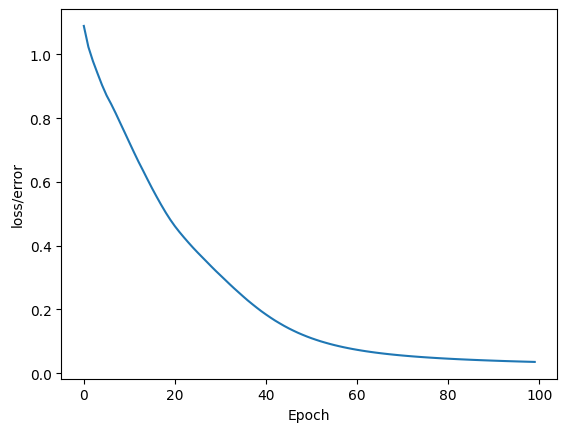

In [33]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [34]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [35]:
loss

tensor(0.1383)

In [36]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([-7.6643,  3.6291,  7.2578]) 	 2 	 2
2.)  tensor([-10.4578,   3.2421,  11.0857]) 	 2 	 2
3.)  tensor([-10.9322,   3.8196,  11.2531]) 	 2 	 2
4.)  tensor([-2.9679,  5.2069,  0.2294]) 	 1 	 1
5.)  tensor([-9.0486,  3.8447,  8.8661]) 	 2 	 2
6.)  tensor([-0.4317,  5.5822, -3.3849]) 	 1 	 1
7.)  tensor([-6.6968,  4.0913,  5.7141]) 	 2 	 2
8.)  tensor([-2.5922,  5.3259, -0.3181]) 	 1 	 1
9.)  tensor([-7.8051,  4.0063,  7.1832]) 	 2 	 2
10.)  tensor([-10.9418,   3.4551,  11.5535]) 	 2 	 2
11.)  tensor([-6.2758,  4.2382,  5.0927]) 	 2 	 2
12.)  tensor([ 11.0823,   4.8537, -21.7305]) 	 0 	 0
13.)  tensor([  9.8330,   4.3431, -19.3394]) 	 0 	 0
14.)  tensor([ 0.3724,  4.8067, -4.1171]) 	 1 	 1
15.)  tensor([  9.5480,   4.8796, -19.0314]) 	 0 	 0
16.)  tensor([-5.8678,  4.5219,  4.3735]) 	 2 	 1
17.)  tensor([  9.9377,   4.6878, -19.6541]) 	 0 	 0
18.)  tensor([-7.2326,  3.9388,  6.5109]) 	 1 	 2
19.)  tensor([ 11.4622,   4.9172, -22.4055]) 	 0 	 0
20.)  tensor([  8.5049,   4.1235, -

In [37]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [38]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [39]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-7.5845,  3.8459,  7.0307])


In [40]:
# Save our NN Model
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')

In [41]:

# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))

<All keys matched successfully>

In [42]:

# Make sure it loaded correctly
new_model.eval()


Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)